This script analyzes the SMART attribute presence in our merged dataset.  
  
**PLEASE MOVE THIS TO Merged_data FOLDER AND DELETE THIS LINE**

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Import dataset
df_og = pd.read_csv('Merged_data/merged_all.csv', low_memory=False)


In [ ]:
# Data Preprocessing
# 1) Remove non-raw columns from the data.
df = df_og.drop([col for col in df_og.columns if col.endswith('_normalized')], axis=1)

# 2) Convert SMART attribute columns to integers where applicable
columns_as_ints = []
for column in df.columns:
    if '_' in column: # e.g., 'smart_5_normalized' or 'serial_number'
        parts = column.split('_')
        if parts[1].isdigit(): # e.g., 'smart_5_normalized'
            columns_as_ints.append(int(partsx[1]))
        else: # e.g., 'serial_number'
            columns_as_ints.append(column)
    else: # e.g., 'date', 'model'
        columns_as_ints.append(column)

df.columns = columns_as_ints

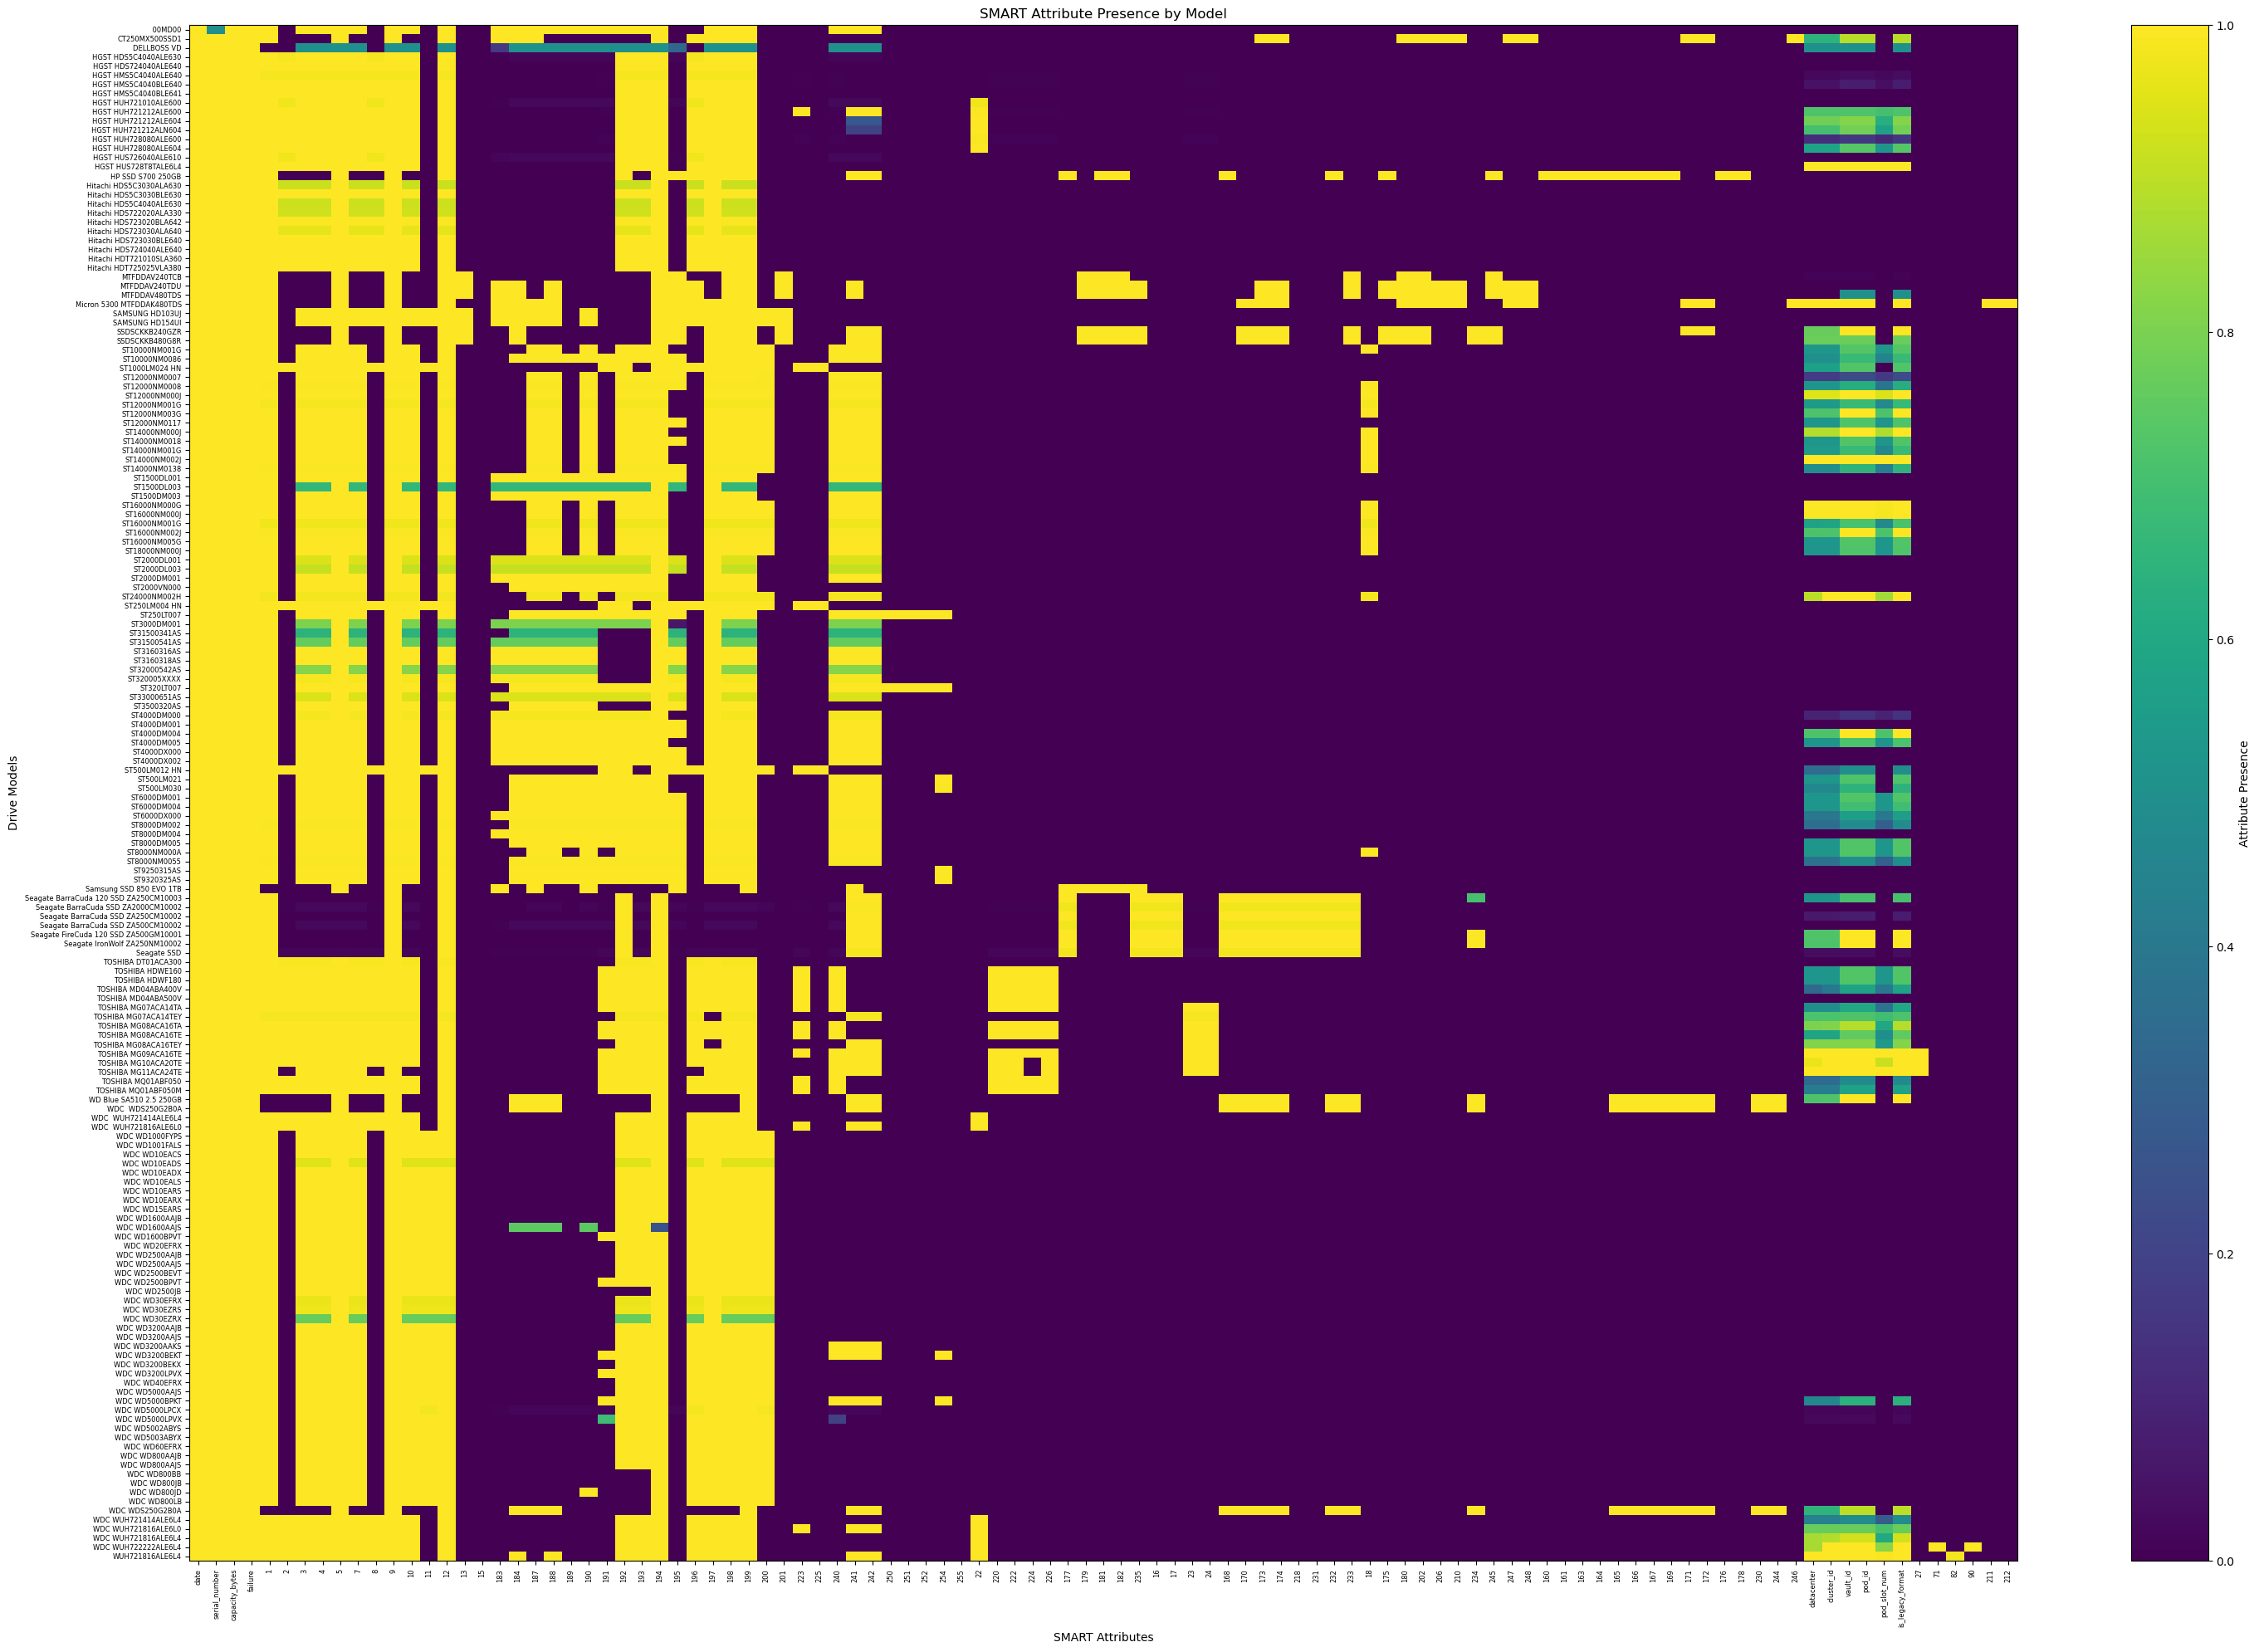

In [4]:
# Which smart attributes are present on which models?
df_model_attributes = df.groupby('model').agg(lambda x: x.notnull().mean())
plt.figure(figsize=(30,20))
plt.imshow(df_model_attributes, cmap='viridis', aspect='auto')
plt.colorbar(label='Attribute Presence')
plt.yticks(range(len(df_model_attributes.index)), df_model_attributes.index, rotation=0, fontsize=6)
plt.xticks(range(len(df_model_attributes.columns)), df_model_attributes.columns, rotation=90, fontsize=6)
plt.title('SMART Attribute Presence by Model')
plt.xlabel('SMART Attributes')
plt.ylabel('Drive Models')
plt.tight_layout()
plt.show()

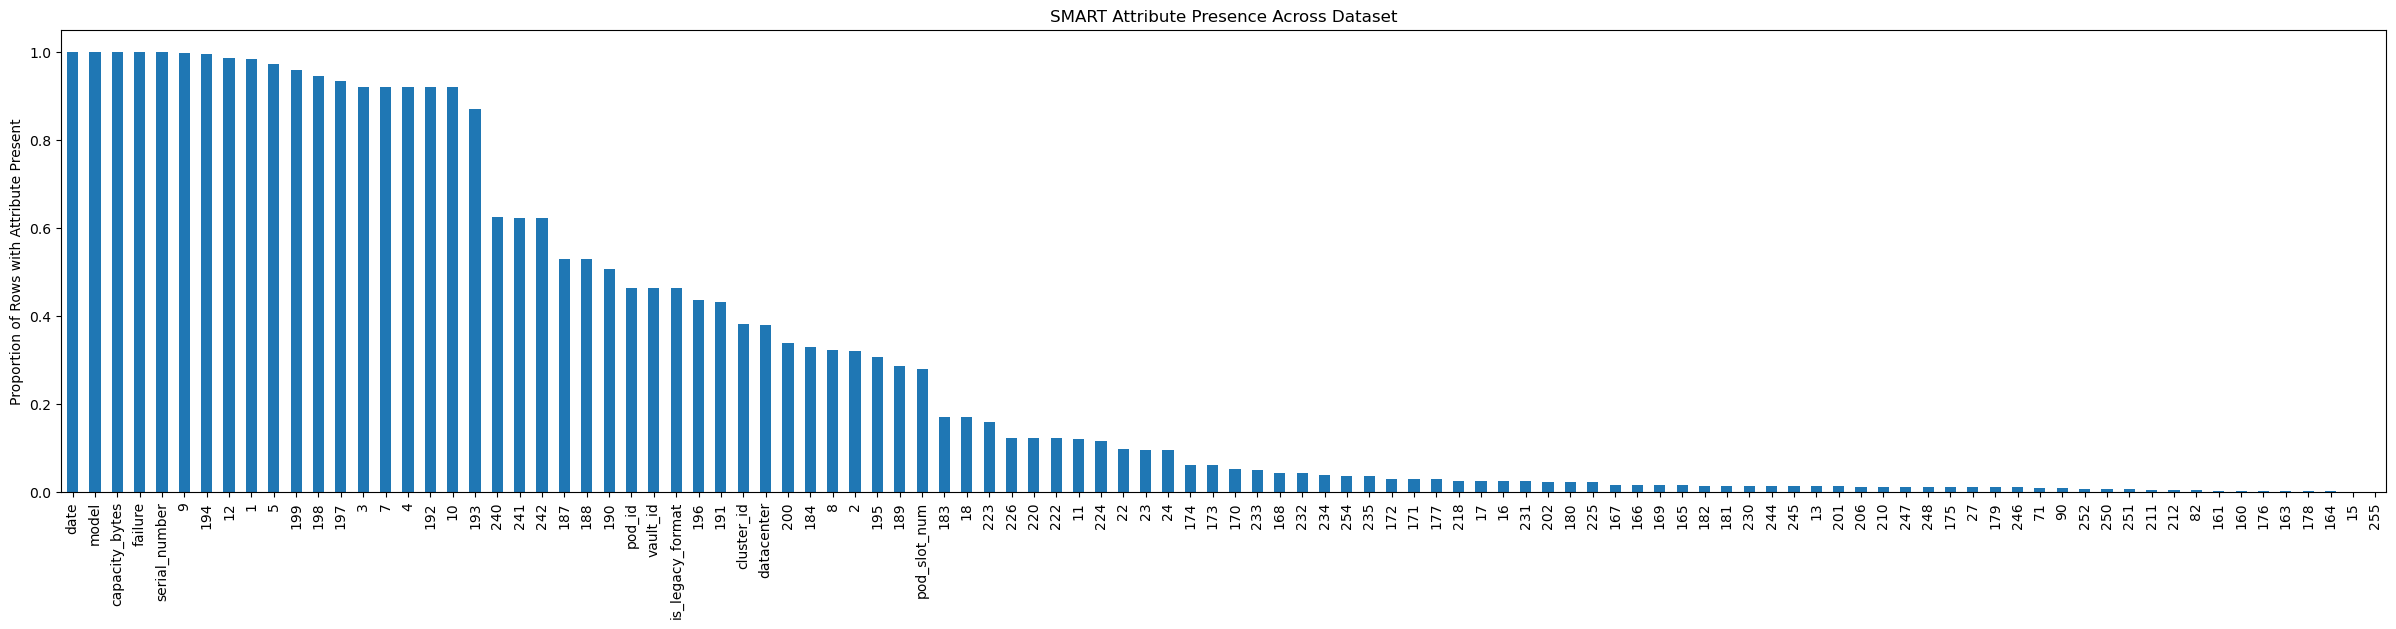

In [5]:
# Bar chart of the smart attributes presence across the dataset
attribute_presence = df.notnull().mean().sort_values(ascending=False)
plt.figure(figsize=(30, 6))
attribute_presence.plot(kind='bar')
plt.ylabel('Proportion of Rows with Attribute Present')
plt.title('SMART Attribute Presence Across Dataset')
plt.show()

In [6]:
# If we don't want to fill in data, we have to pick attributes that are present on most models.
threshold = 0.8
attributes_to_keep = attribute_presence[attribute_presence >= threshold].index.tolist()
attributes_to_keep = [attr for attr in attributes_to_keep if isinstance(attr, int)]  # Keep only SMART attribute columns
print(f"Attributes to keep (present on at least {threshold*100}% of rows): {attributes_to_keep}")

Attributes to keep (present on at least 80.0% of rows): [9, 194, 12, 1, 5, 199, 198, 197, 3, 7, 4, 192, 10, 193]


In [7]:
# Cut the dataset to only these attributes plus model, date, capacity, and failure
columns_to_keep = ['model', 'date', 'capacity_bytes'] + attributes_to_keep + ['failure']
df_reduced = df[columns_to_keep]
print(f"Reduced dataset shape: {df_reduced.shape}")

Reduced dataset shape: (76542, 18)


In [8]:
# What is the failure=1 and failure=0 distribution in the reduced dataset?
failure_counts = df_reduced['failure'].value_counts(normalize=True)
print("Failure distribution in reduced dataset:")
print(failure_counts)

Failure distribution in reduced dataset:
failure
0    0.606412
1    0.393588
Name: proportion, dtype: float64
